In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import re

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("parole.csv")

# Check to see if any data is missing
# make a df with a count of the number of null/na values 
total = df.isnull().sum().sort_values(ascending=False)
# Count the number of null and divide by total number of rows
percent_1 = df.isnull().sum()/df.isnull().count()*100
# Make a second df of %'s
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
# Concat the count and % df
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

Total    %
violator               0  0.0
crime                  0  0.0
multiple.offenses      0  0.0
max.sentence           0  0.0
time.served            0  0.0
state                  0  0.0
age                    0  0.0
race                   0  0.0
male                   0  0.0

In [3]:
# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df)
print(train_df.shape)
print(test_df.shape)

(506, 9)
(169, 9)


In [4]:
df.head()

male  race   age  state  time.served  max.sentence  multiple.offenses  \
0     1     1  33.2      1          5.5            18                  0   
1     0     1  39.7      1          5.4            12                  0   
2     1     2  29.5      1          5.6            12                  0   
3     1     1  22.4      1          5.7            18                  0   
4     1     2  21.6      1          5.4            12                  0   

   crime  violator  
0      4         0  
1      3         0  
2      3         0  
3      1         0  
4      1         0

# ML Models

In [5]:
# Drop the survived columns and PassengerID from test data
X_train = train_df.drop("violator", axis=1)
Y_train = train_df["violator"]
X_test  = test_df.drop("violator", axis=1).copy()

In [6]:
# Stochastic Gradient Descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

88.14

In [7]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [19]:
importances = random_forest.feature_importances_
importances

array([0.03140113, 0.03198833, 0.2765857 , 0.12423938, 0.28421929,
       0.12968974, 0.05473962, 0.06713682])

In [8]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/home/cody/workspace/miniconda3/envs/cody-dev/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


88.14

In [9]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

91.11

In [4]:
# Gaussian Naive Bayes
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train) 
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

ImportError: No module named sklearn

In [11]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/home/cody/workspace/miniconda3/envs/cody-dev/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


88.14

In [12]:
# Linear SVM
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/home/cody/workspace/miniconda3/envs/cody-dev/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


87.94

In [13]:
# Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [14]:
# See all results
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model
Score                             
100.00               Random Forest
100.00               Decision Tree
91.11                          KNN
88.14          Logistic Regression
88.14                   Perceptron
88.14   Stochastic Gradient Decent
87.94      Support Vector Machines
87.35                  Naive Bayes

In [15]:
# K Fold Cross Val
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.90196078 0.90196078 0.84313725 0.8627451  0.90196078 0.90196078
 0.84       0.86       0.88       0.86      ]
Mean: 0.8753725490196078
Standard Deviation: 0.0240240812160962


In [16]:
#493 passengers were correctly classified as not survived (called true negatives) and 56 where wrongly classified as not survived (false positives).
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[435,  11],
       [ 51,   9]])

Precision: 0.45
Recall: 0.15


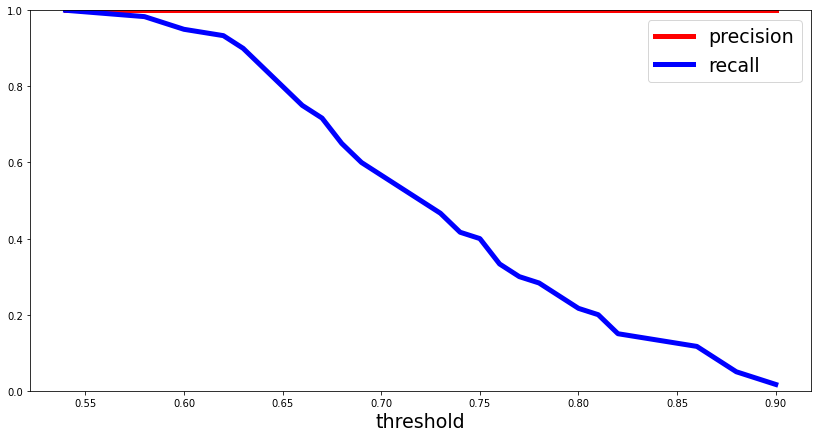

In [17]:
# Precision and recall
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

# Precision and recall - graph
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()